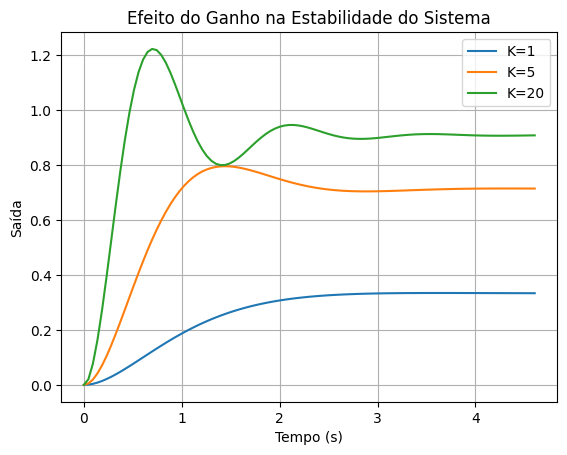

In [14]:
# Capítulo 6 - Estabilidade de Sistemas Lineares com Realimentação
# biblioteca de controle
!pip install control
import numpy as np
import matplotlib.pyplot as plt
import control as ctrl


# Definição do sistema base

# Planta: G(s) = 1 / (s² + 3s + 2)
G = ctrl.tf([1], [1, 3, 2])

# Ganhos de realimentação a testar
K_values = [1, 5, 20]


#  Resposta ao degrau para diferentes ganhos

plt.figure()
for K in K_values:
    C = ctrl.tf([K], [1])
    T = ctrl.feedback(C * G, 1)
    t, y = ctrl.step_response(T)
    plt.plot(t, y, label=f'K={K}')

plt.title('Efeito do Ganho na Estabilidade do Sistema')
plt.xlabel('Tempo (s)')
plt.ylabel('Saída')
plt.grid(True)
plt.legend()
plt.show()

K=1 → Polos: [-1.5+0.8660254j -1.5-0.8660254j]
K=5 → Polos: [-1.5+2.17944947j -1.5-2.17944947j]
K=20 → Polos: [-1.5+4.44409721j -1.5-4.44409721j]


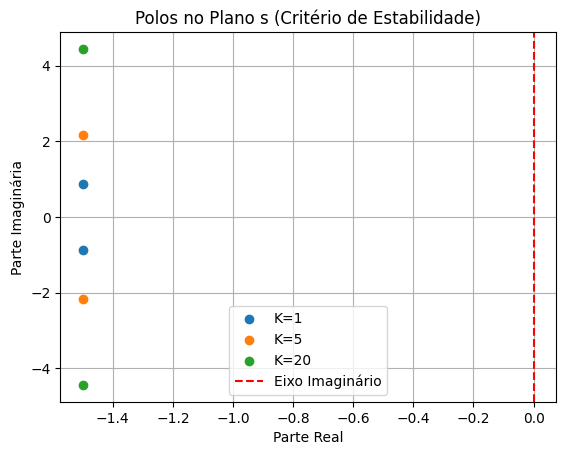

In [15]:

#Cálculo e exibição dos polos

def get_poles(sys):
    """
    Retorna os polos do sistema de forma compatível com
    diferentes versões do pacote python-control.
    """
    if hasattr(sys, "poles"):
        return sys.poles()
    elif hasattr(sys, "pole"):
        return sys.pole()         # versões intermediárias
    else:
        raise AttributeError("O método de polos não está disponível neste objeto.")

for K in K_values:
    C = ctrl.tf([K], [1])
    T = ctrl.feedback(C * G, 1)
    poles = get_poles(T)
    print(f"K={K} → Polos: {poles}")


# Visualização dos polos no plano s

plt.figure()
for K in K_values:
    C = ctrl.tf([K], [1])
    T = ctrl.feedback(C * G, 1)
    poles = get_poles(T)
    plt.scatter(np.real(poles), np.imag(poles), label=f'K={K}')

plt.axvline(0, color='r', linestyle='--', label='Eixo Imaginário')
plt.title('Polos no Plano s (Critério de Estabilidade)')
plt.xlabel('Parte Real')
plt.ylabel('Parte Imaginária')
plt.legend()
plt.grid(True)
plt.show()


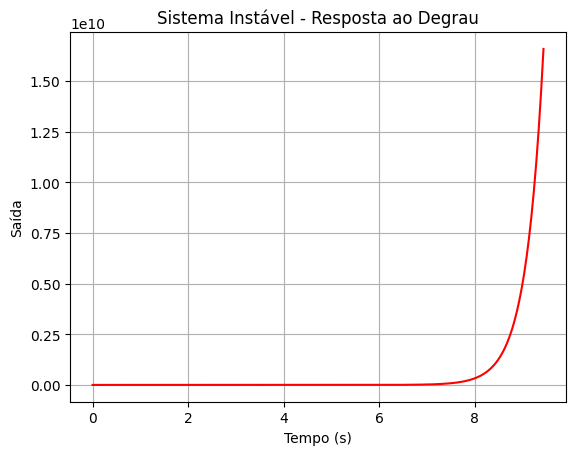

In [16]:

# Exemplo de sistema instável

# Sistema com polos no semiplano direito
G_unstable = ctrl.tf([1], [1, -2, -3])
T_unstable = ctrl.feedback(G_unstable, 1)
t, y = ctrl.step_response(T_unstable)

plt.figure()
plt.plot(t, y, color='r')
plt.title('Sistema Instável - Resposta ao Degrau')
plt.xlabel('Tempo (s)')
plt.ylabel('Saída')
plt.grid(True)
plt.show()
